# Módulo 30: Intruducción a las Series de Tiempo: Parte 1
- Una serie de tiempo es un conjunto de puntos ordenados con relación al tiempo
- Los putnos de datos están ordenados en unidades equidistantes de tiempo
- Las series de tiempo se visualizan con una gráfica llamada serie de tiempo (gráfico de lineas con el eje x siendo el tiempo transcurrido)
- Aplicaciones: finanzas, agricultura, econometría, predicción de clima, control de procesos, procesamiento de señales, etc.
- Componentes de una serie de tiempo:
    - Tendencia: Componente de base que indica si la serie es ascendente o descendente. Es un componente de largo plazo, menos abrupto en su movimiento
    - Estacionalidad: Ciclos repetitivos en la serie, identificados por patrones en su comportamiento. Por ejemplo ventas altas en mayo y bajas en diciembre
    - Componente Cíclico: Es la parte de la serie de tiempo que puede ser explicada por movimientos cíclicos en otras variables de base (sistémicas), como la economía
    - Ruido: Variación aleatoria en la serie de tiempo. No puede ser explicada por movimientos de base o patrones
- Otros componentes que se usan para modelos de ML de series de tiempo (predicciones):
    - Residuo: Usado en procesos de fit de series de tiempo, el resifuo es lo que queda al final del proceso. Es la diferencia entre la predicción y lo observado
    - Nivel: El valor promedio de una serie de tiempo
- Se pueden hacer gráficos de:
    - Serie de tiempo observada
    - Tendencia
    - Estacionalidad
    - Residuos
- Utilizando la información de las series de tiempo se pueden seleccionar diferentes modelos que van a tratar de predecir los valores futuros de la misma. Dependiendo de la frecuencia del comportamiento de los datos, la predicción puede ser muyfideidigna y servir para la toma de decisiones

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import os

In [3]:
# Se importa el archivo de datos
df_apple = pd.read_csv('AAPL.csv', index_col='Date', parse_dates=['Date'])
df_apple

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2006-01-03,2.585000,2.669643,2.580357,2.669643,2.269044,807234400
2006-01-04,2.683214,2.713571,2.660714,2.677500,2.275722,619603600
2006-01-05,2.672500,2.675000,2.633929,2.656429,2.257813,449422400
2006-01-06,2.687500,2.739286,2.662500,2.725000,2.316095,704457600
2006-01-09,2.740357,2.757143,2.705000,2.716071,2.308504,675040800
...,...,...,...,...,...,...
2017-12-22,43.669998,43.855000,43.625000,43.752499,41.483433,65397600
2017-12-26,42.700001,42.867500,42.419998,42.642502,40.431004,132742000
2017-12-27,42.525002,42.695000,42.427502,42.650002,40.438103,85992800


## Exploratory Data Analysis

In [4]:
df_apple.shape

(3020, 6)

# Análisis Univariado

In [5]:
df_apple.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3020 entries, 2006-01-03 to 2017-12-29
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       3020 non-null   float64
 1   High       3020 non-null   float64
 2   Low        3020 non-null   float64
 3   Close      3020 non-null   float64
 4   Adj Close  3020 non-null   float64
 5   Volume     3020 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 165.2 KB


In [6]:
# Estadísticas
df_apple.describe().T

,count,mean,std,min,25%,50%,75%,max
Open,3020.0,1.616592e+01,1.113043e+01,1.847500e+00,5.857233e+00,1.446464e+01,2.478063e+01,4.377750e+01
High,3020.0,1.631163e+01,1.120217e+01,1.888929e+00,5.951072e+00,1.461321e+01,2.506205e+01,4.430000e+01
Low,3020.0,1.600583e+01,1.105661e+01,1.791429e+00,5.753929e+00,1.432625e+01,2.459438e+01,4.371500e+01
Close,3020.0,1.616319e+01,1.113314e+01,1.809643e+00,5.855000e+00,1.447464e+01,2.486500e+01,4.410500e+01
Adj Close,3020.0,1.443320e+01,1.042311e+01,1.538093e+00,4.976415e+00,1.237045e+01,2.250561e+01,4.181765e+01
Volume,3020.0,5.242699e+08,4.066817e+08,4.590360e+07,2.126400e+08,4.265520e+08,7.177646e+08,3.372970e+09


In [7]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [8]:
df_apple.describe().T

,count,mean,std,min,25%,50%,75%,max
Open,3020.00,16.17,11.13,1.85,5.86,14.46,24.78,43.78
High,3020.00,16.31,11.20,1.89,5.95,14.61,25.06,44.30
Low,3020.00,16.01,11.06,1.79,5.75,14.33,24.59,43.72
Close,3020.00,16.16,11.13,1.81,5.85,14.47,24.87,44.10
Adj Close,3020.00,14.43,10.42,1.54,4.98,12.37,22.51,41.82
Volume,3020.00,524269885.56,406681694.80,45903600.00,212640000.00,426552000.00,717764600.00,3372969600.00


In [9]:
# Cuenta el número de ceros por cada columna
# Se aplica cuando se tienen mínimos = 0
df_apple[df_apple==0].count() / df_apple.count()

Open        0.00
High        0.00
Low         0.00
Close       0.00
Adj Close   0.00
Volume      0.00
dtype: float64

## Visualización de Series de Tiempo

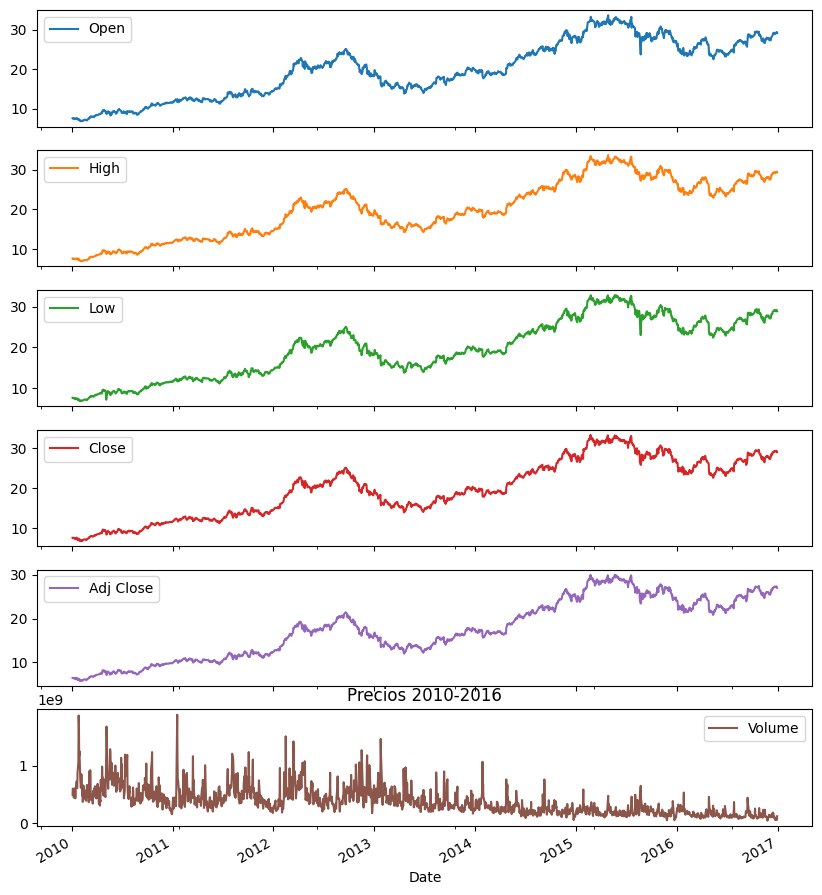

In [10]:
# Visualización básica a través de rangos
# Usando matplotlib
df_apple['2010':'2016'].plot(subplots=True, figsize=(10,12))
plt.title('Precios 2010-2016')
plt.show()

## Visualización de Lags
- Útil para ver cambio de tendencia o ruptura de la misma
- El lag se usa como un atributo de los datos. Nos sirve el precio de hoy, pero tambien puede servir saber cómo estaba el precio hace un año o seis meses, etc.

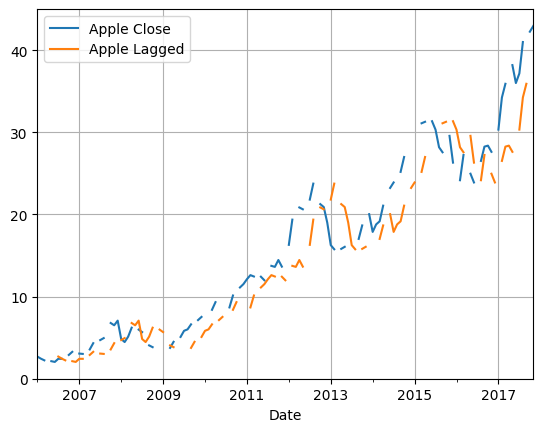

In [11]:
# Lag = 3 (meses)
df_apple['Close'].asfreq('M').plot(legend=True)
lag = 6
shifted = df_apple['Close'].asfreq('M').shift(lag).plot(legend=True)
shifted.legend(['Apple Close', 'Apple Lagged'])
plt.grid()
plt.show()

In [12]:
# Gráfico de cambio porcentual
df_apple['Change'] = df_apple['Close'].div(df_apple['Close'].shift())

In [13]:
pd.set_option('display.float_format', lambda x : '%.4f' % x)
df_apple.head(20)

,Open,High,Low,Close,Adj Close,Volume,Change
Date,,,,,,,
2006-01-03,2.5850,2.6696,2.5804,2.6696,2.2690,807234400,NaN
2006-01-04,2.6832,2.7136,2.6607,2.6775,2.2757,619603600,1.0029
2006-01-05,2.6725,2.6750,2.6339,2.6564,2.2578,449422400,0.9921
2006-01-06,2.6875,2.7393,2.6625,2.7250,2.3161,704457600,1.0258
2006-01-09,2.7404,2.7571,2.7050,2.7161,2.3085,675040800,0.9967
2006-01-10,2.7232,2.9246,2.7082,2.8879,2.4545,2279869200,1.0632
2006-01-11,2.9943,3.0286,2.9496,2.9964,2.5468,1493794400,1.0376
2006-01-12,3.0346,3.0857,2.9864,3.0104,2.5586,1280809600,1.0046
2006-01-13,3.0354,3.0718,3.0214,3.0568,2.5981,776305600,1.0154


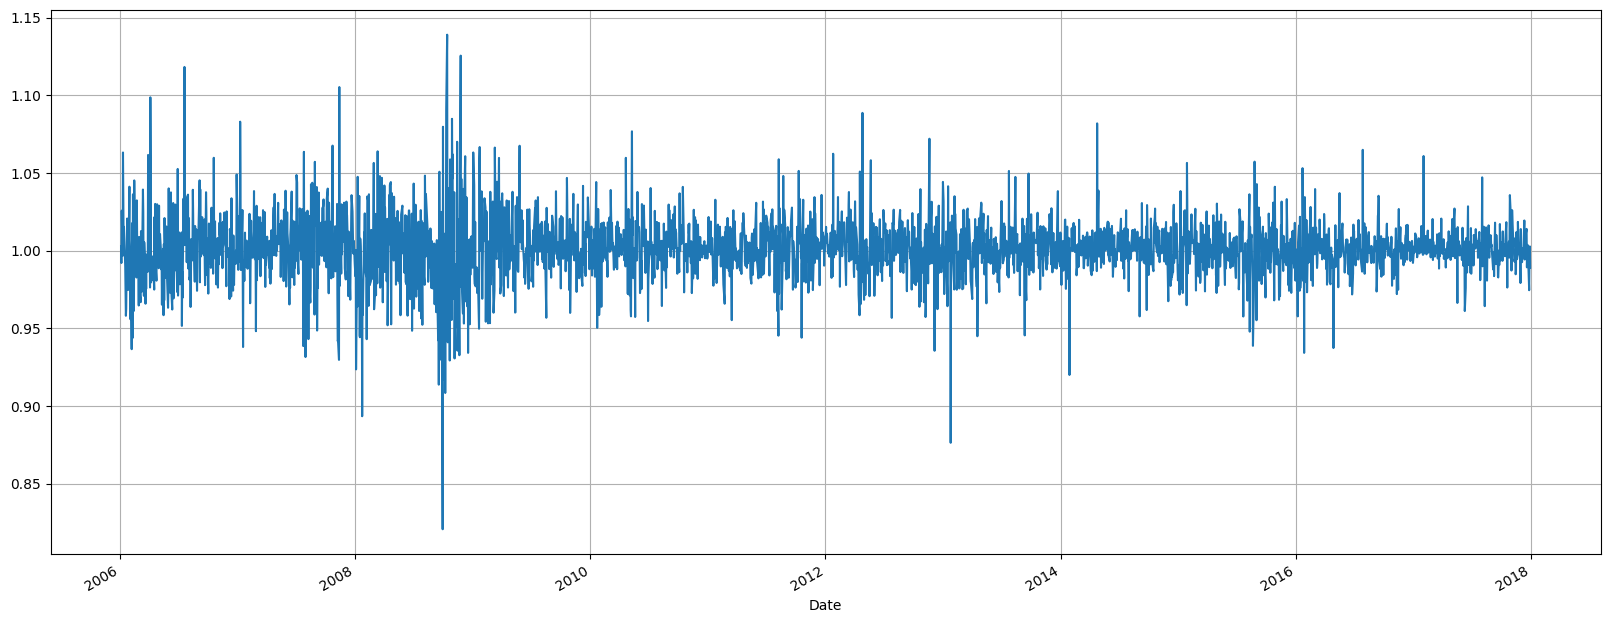

In [14]:
df_apple['Change'].plot(figsize=(20,8)).grid()

In [15]:
# Calculo el retorno
df_apple['Return'] = df_apple['Change'].sub(1).mul(100)
df_apple

,Open,High,Low,Close,Adj Close,Volume,Change,Return
Date,,,,,,,,
2006-01-03,2.5850,2.6696,2.5804,2.6696,2.2690,807234400,NaN,NaN
2006-01-04,2.6832,2.7136,2.6607,2.6775,2.2757,619603600,1.0029,0.2943
2006-01-05,2.6725,2.6750,2.6339,2.6564,2.2578,449422400,0.9921,-0.7870
2006-01-06,2.6875,2.7393,2.6625,2.7250,2.3161,704457600,1.0258,2.5813
2006-01-09,2.7404,2.7571,2.7050,2.7161,2.3085,675040800,0.9967,-0.3277
...,...,...,...,...,...,...,...,...
2017-12-22,43.6700,43.8550,43.6250,43.7525,41.4834,65397600,1.0000,0.0000
2017-12-26,42.7000,42.8675,42.4200,42.6425,40.4310,132742000,0.9746,-2.5370
2017-12-27,42.5250,42.6950,42.4275,42.6500,40.4381,85992800,1.0002,0.0176


### Comparación de dos series

In [16]:
# Comparación de dos series
# Se usa index_col con Date para usar la fecha como índice
df_google = pd.read_csv('GOOG.csv', parse_dates=['Date'], index_col='Date')

In [17]:
df_google

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2006-01-03,10.5236,10.8511,10.4165,10.8401,10.8401,526815259
2006-01-04,11.0561,11.1821,10.9527,11.0894,11.0894,613747887
2006-01-05,11.1084,11.2466,10.9963,11.2389,11.2389,433952486
2006-01-06,11.3791,11.7186,11.2887,11.5980,11.5980,712938289
2006-01-09,11.6167,11.7908,11.4805,11.6289,11.6289,513593887
...,...,...,...,...,...,...
2017-12-22,53.0555,53.2100,52.9720,53.0060,53.0060,15102000
2017-12-26,52.9035,53.0060,52.5100,52.8370,52.8370,15212000
2017-12-27,52.8695,52.9185,52.4025,52.4685,52.4685,25438000


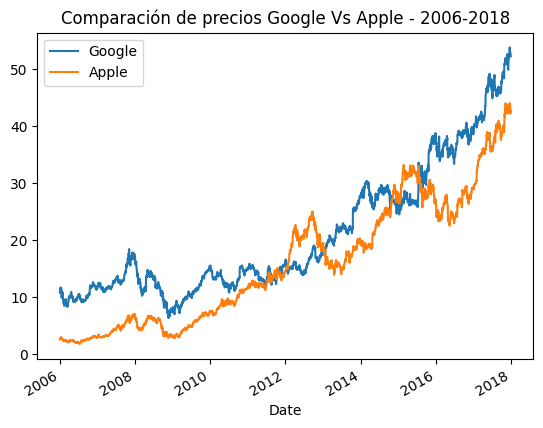

In [18]:
# Grafico de colum,mnas de dos series diferentes
df_google.Close.plot()
df_apple.Close.plot()
plt.legend(['Google', 'Apple'])
plt.title('Comparación de precios Google Vs Apple - 2006-2018')
plt.show()

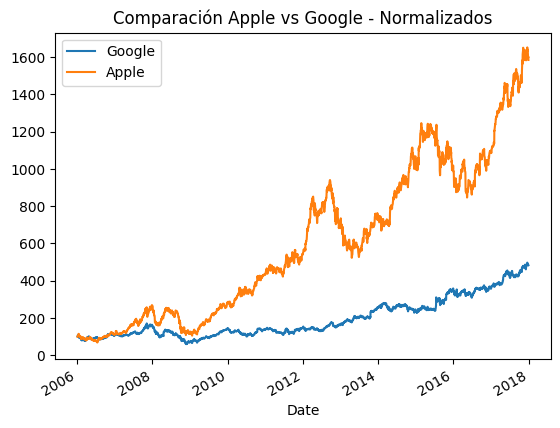

In [19]:
# Se normalizan las vistas cn base 100 para tener una vase de comparación similar
# La normalización toma como base el primer registro histórico (iloc[0])
# Ambos precios empiezan en 100
normal_google = df_google.Close.div(df_google.Close.iloc[0]).mul(100)
normal_apple = df_apple.Close.div(df_apple.Close.iloc[0]).mul(100)
normal_google.plot()
normal_apple.plot()
plt.legend(['Google', 'Apple'])
plt.title('Comparación Apple vs Google - Normalizados')
plt.show()

### Visualización de Medias
- Generación de la media movil

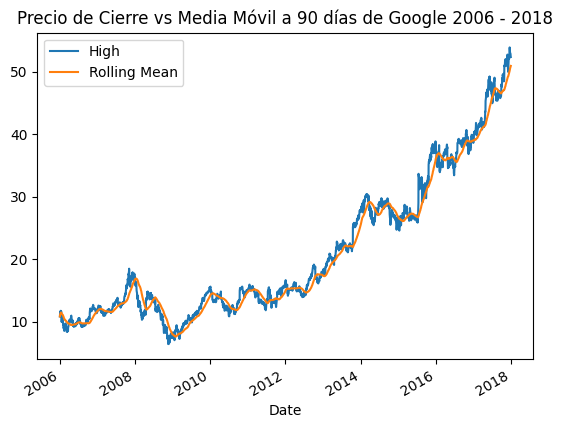

In [22]:
# Ventana Media Móvil en Google 90 días
# Se usa la función rolling
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.rolling.html
rolling_google = df_google.Close.rolling('90D').mean()
df_google.Close.plot()
rolling_google.plot()
plt.title('Precio de Cierre vs Media Móvil a 90 días de Google 2006 - 2018')
plt.legend(['High', 'Rolling Mean'])

### Visualizaciones Financieras: Gráficos OHLC
- Acrónimo de Open, High, Low, Close de un periodo de tiempo
- Se usan como una herramienta para ver cambios de precios en stocks y en otros activos financieros
- Son buenos para revisar el sentimiento del mercado y además hacer predicciones de cambios
- El eje X, como cualquier serie de tiempo, corresponde al tiempo, mientras que el eje Y al nivel de precio que se esté analizando
- Se muestra el High y Low como el largo de la barra, mientras que se tienen marcas mostrando el Open y Close
- El color de la barra indica si el mercado está al alza (verde) o a la baja(rojo)

In [29]:
%matplotlib inline
from pylab import rcParams

# Instala char_studio
from chart_studio import plotly
from chart_studio import grid_objs
import chart_studio.plotly as py
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)

# from plotly import tools
import chart_studio.plotly as py
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import plotly.graph_objects as go
import plotly.figure_factory as ff
import statsmodels.api as sm
from numpy.random import normal, seed
from scipy.stats import norm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import math
from sklearn.metrics import mean_squared_error

In [31]:
# Gráfico OHLC
rango_ohlc = go.Ohlc(x=df_google['06-2008'].index,
                     open=df_google['06-2008']['Open'],
                     high=df_google['06-2008']['High'],
                     low=df_google['06-2008']['Low'],
                     close=df_google['06-2008']['Close'])
data = [rango_ohlc]
iplot(data)

In [32]:
rango_ohlc = go.Ohlc(x=df_google['2008'].index,
                     open=df_google['2008']['Open'],
                     high=df_google['2008']['High'],
                     low=df_google['2008']['Low'],
                     close=df_google['2008']['Close'])
data = [rango_ohlc]
iplot(data)

### Gráfico de Vela - Candlesticks
- Usado como una forma de visualización y apoyo de trading
- Es (visualmente) parecido a un box plot pero no se deben de confundir
- También muestra el Open, Close, High y Low con sus propios símbolos y adaptado a la frecuencia del gráfico
- El eje X es el tiempo
- El rectángulo muestra el rango entre el Open y Close
- Las líneas de la parte inferior y superior muestran el High y Low del periodo
- Si el trading va al alza se pinta de verde o blanca, mientras que si el mercado está a la baja (el Close es menor al Open), se pinta de negro o rojo

In [34]:
# Gráfica de velas (Candlesticks)
trace = go.Candlestick(x=df_google['06-2008'].index,
                       open=df_google['06-2008']['Open'],
                       high=df_google['06-2008']['High'],
                       low=df_google['06-2008']['Low'],
                       close=df_google['06-2008']['Close'])

data = [trace]
iplot(data)

In [36]:
trace = go.Candlestick(x=df_google['2008'].index,
                       open=df_google['2008']['Open'],
                       high=df_google['2008']['High'],
                       low=df_google['2008']['Low'],
                       close=df_google['2008']['Close'])

data = [trace]
iplot(data)

### Descomposición de una Serie de Tiempo

Text(0.5, 1.0, 'Closing Stock Price - Google 2006-2018')

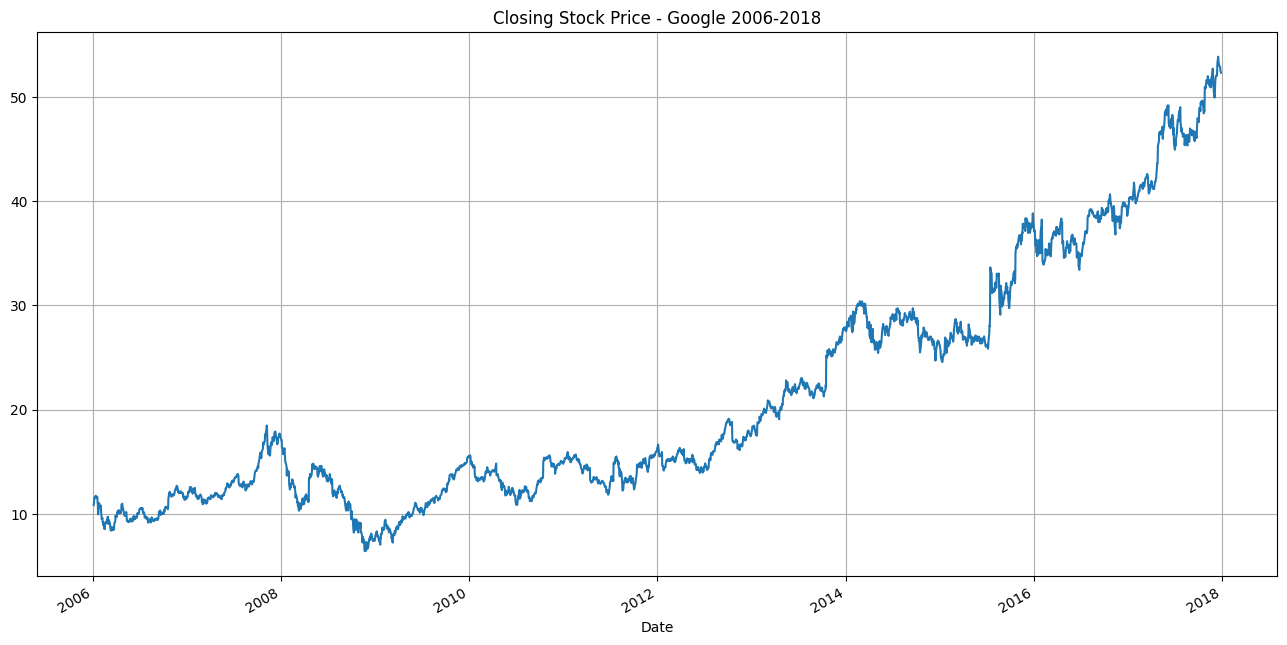

In [39]:
df_google['Close'].plot(figsize=(16,8)).grid()
plt.title('Closing Stock Price - Google 2006-2018')

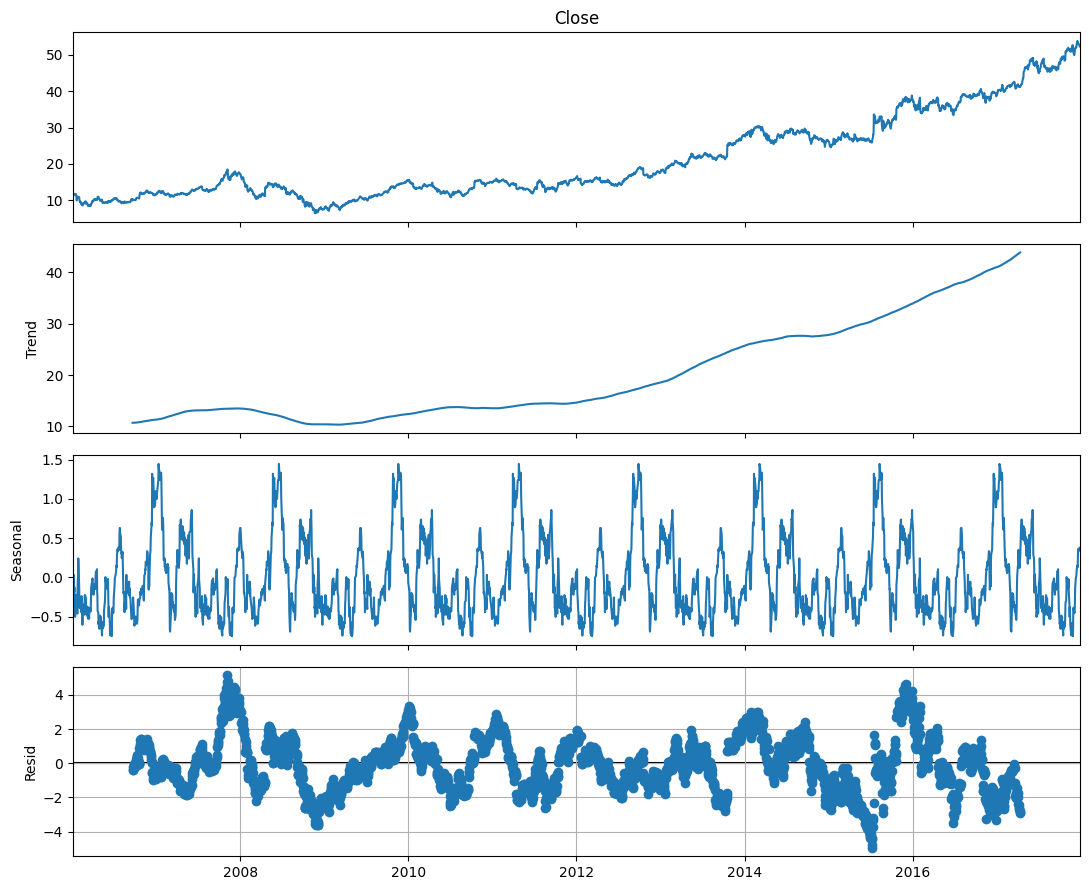

In [45]:
# Para la descomposición
rcParams['figure.figsize'] = 11, 9

# Se usa frecuencia anual
descomposed_google_volume = sm.tsa.seasonal_decompose(x=df_google['Close'], period=360)
figure = descomposed_google_volume.plot()
plt.grid()
plt.show()


#### Insights
- Tendencia creciente
- Estacionalidad claramente identificada
- Ruido (noise) que representa outliers y valores posiblemente no incluidos
---
### Predicción Simple - Medias Móviles
- Se hará una predicción usando medis móviles
- La media móvil no es más que sacar el promedio de una ventana de tiempo hacia atrás de la variable a predecir

In [46]:
# Genera una serie con la media móvil de 30 días
ma_google = df_google.rolling(window=30)
ma_google_mean = ma_google.mean()
ma_google_mean

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2006-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-04,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-05,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-06,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-09,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
2017-12-22,51.7777,52.1736,51.4600,51.8314,51.8314,27067933.3333
2017-12-26,51.8303,52.2226,51.5015,51.8792,51.8792,27095000.0000
2017-12-27,51.8870,52.2672,51.5440,51.9186,51.9186,27352400.0000


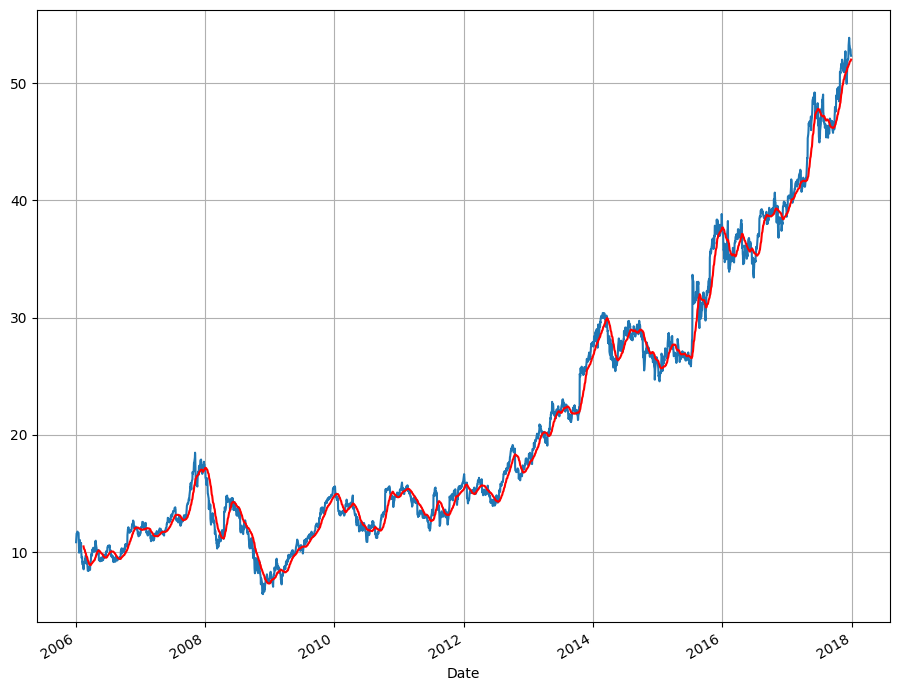

In [48]:
# Se muestran los dos datasets
df_google['Close'].plot()
ma_google_mean['Close'].plot(color='red')
plt.grid()
plt.show()

In [49]:
# La media móvil puede ser utilizada como otro feature (atributo) del set de datos
# Es decir, podría utilizar el High-Lag como otro atributo, que es muy común en modelos de ML

#### Predicción con Medias Móviles

In [51]:
train_len = 2500
# De los días totales del dataset total, se van a tomar "train_len" como training y el resto como testing
train = df_google[0:train_len]      # First 2500 days for training
test = df_google[train_len:]        # The rest are used for testing

In [53]:
y_pred_sma = df_google.copy()
ma_window = 30
y_pred_sma['sma_forecast'] = df_google['High'].rolling(ma_window).mean()
y_pred_sma['sma_forecast'][train_len] = y_pred_sma['sma_forecast'][train_len-1]

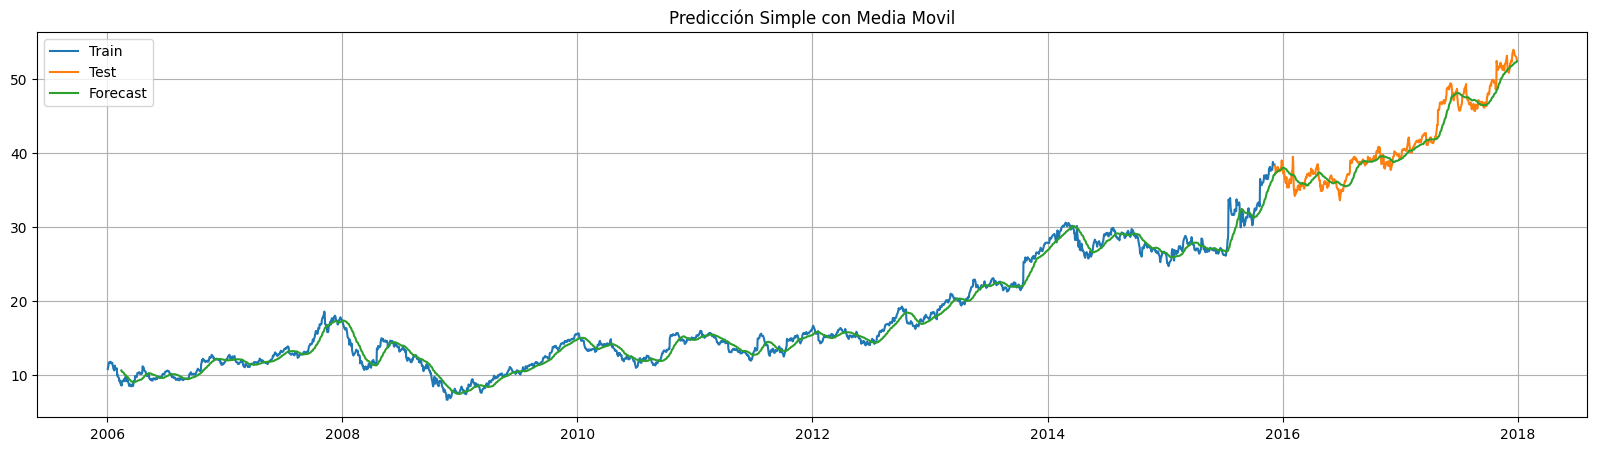

In [54]:
# Gráficar las predicciónes
plt.figure(figsize=(20,5))
plt.grid()
plt.plot(train['High'], label='Train')
plt.plot(test['High'], label='Test')
plt.plot(y_pred_sma['sma_forecast'], label='Forecast')
plt.legend(loc='best')
plt.title('Predicción Simple con Media Movil')
plt.show()

#### ¿Cómo saber si las predicciones fueron buenas?
- Se usan dos medidas: RMSE (Root mean square error) y MAPE ( Mean absolute percentage error)
- RMSE muestra la raíz cuadrada de la diferencia entre los valores predichos y las observaciones
- Estas medidas nos sirven para validar qué tan buenas fueron las predicciones

https://www.kaggle.com/code/gauravduttakiit/timeseries-forecasting-with-simple-moving-average

https://en.wikipedia.org/wiki/Mean_absolute_percentage_error

https://en.wikipedia.org/wiki/Root-mean-square_deviation

In [56]:
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(test['High'], y_pred_sma['sma_forecast'][train_len:])).round(2)
mape = np.round(np.mean(np.abs(test['High'] - y_pred_sma['sma_forecast'][train_len:])/test['High'])*100,2)

print(f'RMSE: {rmse}\nMAPE: {mape}')

RMSE: 1.29
MAPE: 2.39


In [58]:
# Compara las predicciones con la data real
y_comparison = pd.DataFrame().assign(forecast=y_pred_sma['sma_forecast'])
y_comparison['observed'] = df_google['High']
y_comparison.tail(40)

,forecast,observed
Date,,
2017-11-02,49.1336,51.4045
2017-11-03,49.2968,51.6325
2017-11-06,49.4776,51.7435
2017-11-07,49.6495,51.6985
2017-11-08,49.8056,52.1761
2017-11-09,49.9444,51.6995
2017-11-10,50.0627,51.5380
2017-11-13,50.1777,51.5790
2017-11-14,50.2924,51.3405


#### Wrap-Up
- Conceptos básicos de Series de Tiempo
- EDA
- Visualización de Series de Tiempo
- Gráficos financieros
    - OHLC
    - Candlesticks
- Predicción Simple con Medias Móviles